In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

Read data
Reference(https://github.com/lorrandal/glucose-prediction)

In [20]:
ys = np.genfromtxt(fname = 'data/ys.csv', delimiter = ',')
ts = np.genfromtxt(fname = 'data/ts.csv', delimiter = ',')

# Convert array to pandas DF

ys = pd.DataFrame(ys)
ts = pd.DataFrame(ts)

Fit model and prediction

In [9]:
# First order polynomial model

# Parameters of the prediction model.
# ph - prediction horizon
# mu - forgetting factor

ph, mu = 30, 0.9
n_s = len(ys)

# initialize new array to store predicted values
tp_pred = np.zeros(n_s - 1)
yp_pred = np.zeros(n_s - 1)

# Simulating real time data acquisition and prediction of ph min ahead
# At each iteration , a new sample from CGM is acquired

for i in range(2, n_s+1):
    ts_tmp = ts[:i]
    ys_tmp = ys[:i]
    ns = len(ys_tmp)
    #mu**k coeff represent the weight of the BG sample
    # at k instances before current sample time, 
    #last acquired sample's weight is mu**k where k==0
    # and it has the greatest weight
    weights = np.ones(ns)*mu
    
    for k in range(ns):
        weights[k] = weights[k]**k
    weights = np.flip(weights,0)
    
    # Build model
    # Ordinary least square linear regression
    lm_tmp = linear_model.LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)
    #Coefficient of the linear model, y = mx + q
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_
    
    #prediction
    tp = ts.iloc[ns-1,0] + ph
    yp = m_tmp*tp + q_tmp
    
    tp_pred[i-2] = tp
    yp_pred[i-2] = yp

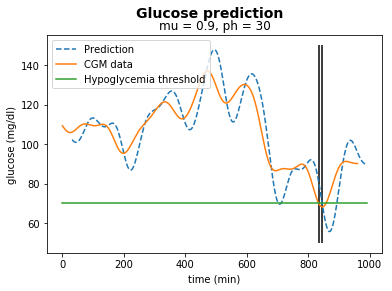

In [23]:
#plot
#Hypoglycemia threshold vector
t_tot = [l for l in range(int(ts.min()), int(tp_pred.max()) + 1)]
hypo = 70*np.ones(len(t_tot))

fig,ax = plt.subplots()
fig.suptitle('Glucose prediction', fontsize = 14, fontweight = 'bold')
ax.set_title('mu = %g, ph = %g'%(mu,ph))
ax.plot(tp_pred, yp_pred, '--', label='Prediction') 
ax.plot(ts.iloc[:,0], ys.iloc[:,0], label='CGM data') 
ax.plot(t_tot, hypo, label='Hypoglycemia threshold')
ax.vlines(x = 845,ymin = 50, ymax = 150)
ax.vlines(x = 835,ymin = 50, ymax = 150)
ax.set_xlabel('time (min)')
ax.set_ylabel('glucose (mg/dl)')
ax.legend()

The algorithm was able to predict the hypoglycemia around 20min earlier, 30(ph)-10min(845-835)

In [24]:
#Now change ph to 20, mu = 0.9

In [25]:
# First order polynomial model

# Parameters of the prediction model.
# ph - prediction horizon
# mu - forgetting factor

ph, mu = 20, 0.9
n_s = len(ys)

# initialize new array to store predicted values
tp_pred = np.zeros(n_s - 1)
yp_pred = np.zeros(n_s - 1)

# Simulating real time data acquisition and prediction of ph min ahead
# At each iteration , a new sample from CGM is acquired

for i in range(2, n_s+1):
    ts_tmp = ts[:i]
    ys_tmp = ys[:i]
    ns = len(ys_tmp)
    #mu**k coeff represent the weight of the BG sample
    # at k instances before current sample time, 
    #last acquired sample's weight is mu**k where k==0
    # and it has the greatest weight
    weights = np.ones(ns)*mu
    
    for k in range(ns):
        weights[k] = weights[k]**k
    weights = np.flip(weights,0)
    
    # Build model
    # Ordinary least square linear regression
    lm_tmp = linear_model.LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)
    #Coefficient of the linear model, y = mx + q
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_
    
    #prediction
    tp = ts.iloc[ns-1,0] + ph
    yp = m_tmp*tp + q_tmp
    
    tp_pred[i-2] = tp
    yp_pred[i-2] = yp

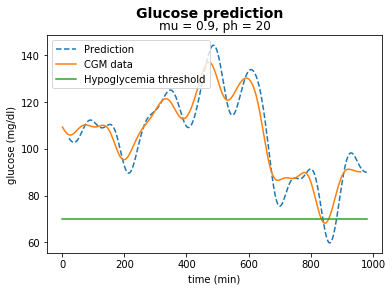

In [27]:
#plot
#Hypoglycemia threshold vector
t_tot = [l for l in range(int(ts.min()), int(tp_pred.max()) + 1)]
hypo = 70*np.ones(len(t_tot))

fig,ax = plt.subplots()
fig.suptitle('Glucose prediction', fontsize = 14, fontweight = 'bold')
ax.set_title('mu = %g, ph = %g'%(mu,ph))
ax.plot(tp_pred, yp_pred, '--', label='Prediction') 
ax.plot(ts.iloc[:,0], ys.iloc[:,0], label='CGM data') 
ax.plot(t_tot, hypo, label='Hypoglycemia threshold')
#ax.vlines(x = 845,ymin = 50, ymax = 150)
#ax.vlines(x = 835,ymin = 50, ymax = 150)
ax.set_xlabel('time (min)')
ax.set_ylabel('glucose (mg/dl)')
ax.legend()

In [28]:
# First order polynomial model

# Parameters of the prediction model.
# ph - prediction horizon
# mu - forgetting factor

ph, mu = 40, 0.9
n_s = len(ys)

# initialize new array to store predicted values
tp_pred = np.zeros(n_s - 1)
yp_pred = np.zeros(n_s - 1)

# Simulating real time data acquisition and prediction of ph min ahead
# At each iteration , a new sample from CGM is acquired

for i in range(2, n_s+1):
    ts_tmp = ts[:i]
    ys_tmp = ys[:i]
    ns = len(ys_tmp)
    #mu**k coeff represent the weight of the BG sample
    # at k instances before current sample time, 
    #last acquired sample's weight is mu**k where k==0
    # and it has the greatest weight
    weights = np.ones(ns)*mu
    
    for k in range(ns):
        weights[k] = weights[k]**k
    weights = np.flip(weights,0)
    
    # Build model
    # Ordinary least square linear regression
    lm_tmp = linear_model.LinearRegression()
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)
    #Coefficient of the linear model, y = mx + q
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_
    
    #prediction
    tp = ts.iloc[ns-1,0] + ph
    yp = m_tmp*tp + q_tmp
    
    tp_pred[i-2] = tp
    yp_pred[i-2] = yp

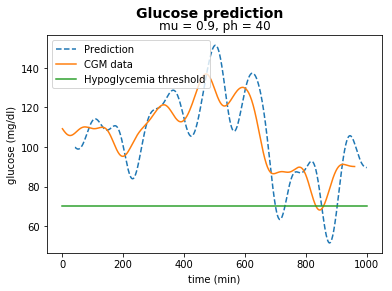

In [29]:
#plot
#Hypoglycemia threshold vector
t_tot = [l for l in range(int(ts.min()), int(tp_pred.max()) + 1)]
hypo = 70*np.ones(len(t_tot))

fig,ax = plt.subplots()
fig.suptitle('Glucose prediction', fontsize = 14, fontweight = 'bold')
ax.set_title('mu = %g, ph = %g'%(mu,ph))
ax.plot(tp_pred, yp_pred, '--', label='Prediction') 
ax.plot(ts.iloc[:,0], ys.iloc[:,0], label='CGM data') 
ax.plot(t_tot, hypo, label='Hypoglycemia threshold')
#ax.vlines(x = 845,ymin = 50, ymax = 150)
#ax.vlines(x = 835,ymin = 50, ymax = 150)
ax.set_xlabel('time (min)')
ax.set_ylabel('glucose (mg/dl)')
ax.legend()